In [1]:
from torchvision import datasets
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# The convolution operation involves a filter (also known as a kernel) that slides over the input sequence, and at each position, it computes a weighted sum of the values in its receptive field.



# [nn.Conv1d](https://pytorch.org/docs/stable/generated/torch.nn.Conv1d.html) - 1D kernal

In [2]:
##### No padding
torch.manual_seed(42)
conv = nn.Conv1d(in_channels = 3, out_channels = 2, kernel_size  = 3)
print(conv.weight)
print(conv.bias)

Parameter containing:
tensor([[[ 0.2548,  0.2767, -0.0781],
         [ 0.3062, -0.0730,  0.0673],
         [-0.1623,  0.1958,  0.2938]],

        [[-0.2445,  0.2897,  0.0624],
         [ 0.2463,  0.0451,  0.1607],
         [-0.0471,  0.2570,  0.0493]]], requires_grad=True)
Parameter containing:
tensor([-0.1556,  0.0850], requires_grad=True)


### - The first dimension equals the number of output channels
### - The second dimension equals the number of input channels
### - The third dimension equals the kernel_size

In [3]:
conv.weight.shape

torch.Size([2, 3, 3])

In [4]:
##### With padding
torch.manual_seed(42)
conv_padding = nn.Conv1d(in_channels  = 3, out_channels = 2, 
                         kernel_size  = 3, padding = 1)
print(conv_padding.weight)
print(conv_padding.bias)

Parameter containing:
tensor([[[ 0.2548,  0.2767, -0.0781],
         [ 0.3062, -0.0730,  0.0673],
         [-0.1623,  0.1958,  0.2938]],

        [[-0.2445,  0.2897,  0.0624],
         [ 0.2463,  0.0451,  0.1607],
         [-0.0471,  0.2570,  0.0493]]], requires_grad=True)
Parameter containing:
tensor([-0.1556,  0.0850], requires_grad=True)


### Input
### - The convolutional layer has dimension (output_channels, input_channels, kernel_size). 
### - The input data should have the dimension (input_channels, width) or (n, input_channels, width):
### - n is the number of batches
### - width needs to be >= kernel_size

In [5]:
torch.manual_seed(42)
input = torch.randn(2,3,4)
input

tensor([[[ 1.9269,  1.4873,  0.9007, -2.1055],
         [ 0.6784, -1.2345, -0.0431, -1.6047],
         [ 0.3559, -0.6866, -0.4934,  0.2415]],

        [[-1.1109,  0.0915, -2.3169, -0.2168],
         [-0.3097, -0.3957,  0.8034, -0.6216],
         [-0.5920, -0.0631, -0.8286,  0.3309]]])

In [6]:
### 2D Input: 
### Representing the case of a single sample with 2D shape
### Then nn.Conv1d treats it as a scenario with a batch size of 1.
conv(torch.randn(3,5))

tensor([[ 0.5508,  0.2023, -0.2260],
        [ 0.1260,  0.0242,  0.6024]], grad_fn=<SqueezeBackward1>)

In [7]:
### 3D Input:
### nn.Conv2d processes it according to this batch size. 
print(conv(torch.randn(1,3,5)))
print('-'*80)
print(conv(torch.randn(2,3,5)))

tensor([[[-0.1569, -0.2168, -1.0328],
         [ 0.2573, -0.0018, -0.0187]]], grad_fn=<ConvolutionBackward0>)
--------------------------------------------------------------------------------
tensor([[[-0.1253,  0.3172, -0.2363],
         [ 0.1297,  0.0629, -0.2129]],

        [[-0.9514,  0.6867, -0.3229],
         [-0.1517,  0.8919, -0.5290]]], grad_fn=<ConvolutionBackward0>)


In [8]:
### incorrect input - 1D input
try:
    conv(torch.randn(4))
except Exception as e:
    print(e)

Expected 2D (unbatched) or 3D (batched) input to conv1d, but got input of size: [4]


In [9]:
### incorrect input - >3D input
try:
    conv(torch.randn(2,3,5,6,4,5))
except Exception as e:
    print(e)

Expected 2D (unbatched) or 3D (batched) input to conv1d, but got input of size: [2, 3, 5, 6, 4, 5]


In [10]:
### wrong dimension - not broadcastable
try:
    conv(torch.randn(2,4,5))
except Exception as e:
    print(e)

Given groups=1, weight of size [2, 3, 3], expected input[2, 4, 5] to have 3 channels, but got 4 channels instead


In [11]:
### wrong dimension - kernel size greater than input size
try:
    conv(torch.randn(2,3,2))
except Exception as e:
    print(e)

Calculated padded input size per channel: (2). Kernel size: (3). Kernel size can't be greater than actual input size


### Output

In [12]:
conv(input)

tensor([[[ 0.6345,  0.2400],
         [-0.0122, -0.7956]],

        [[-0.4041, -1.0328],
         [ 0.2444, -0.9770]]], grad_fn=<ConvolutionBackward0>)

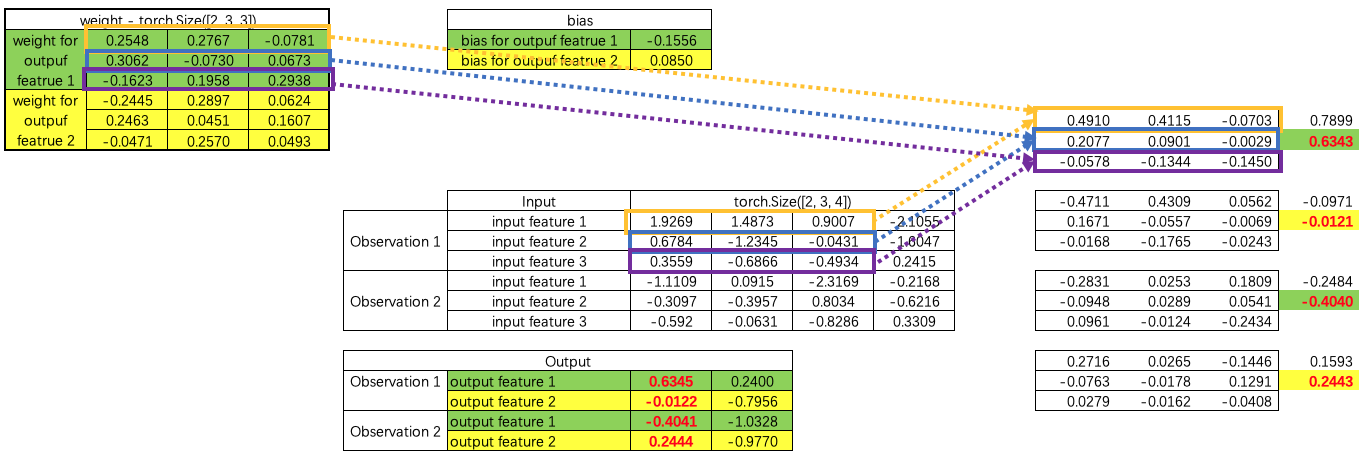

In [13]:
conv_padding(input)

tensor([[[-0.0033,  0.6345,  0.2400, -0.2773],
         [ 0.6259, -0.0122, -0.7956, -0.7431]],

        [[-0.6085, -0.4041, -1.0328, -0.3154],
         [-0.4640,  0.2444, -0.9770,  0.8826]]],
       grad_fn=<ConvolutionBackward0>)

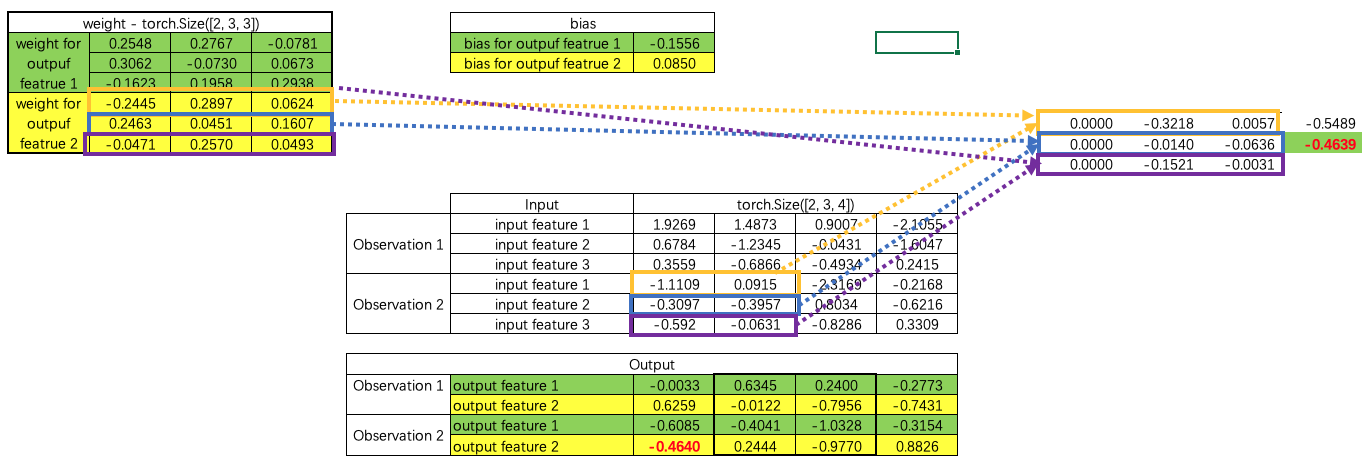

# [nn.Conv2d](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) - 2D kernal

### model

In [14]:
##### No padding
torch.manual_seed(42)
conv = nn.Conv2d(in_channels  = 3, out_channels = 2, kernel_size  = (3,3))
print(conv.weight)
print(conv.bias)

Parameter containing:
tensor([[[[ 0.1471,  0.1597, -0.0451],
          [ 0.1768, -0.0422,  0.0388],
          [-0.0937,  0.1130,  0.1697]],

         [[-0.1412,  0.1673,  0.0360],
          [ 0.1422,  0.0261,  0.0928],
          [-0.0272,  0.1484,  0.0284]],

         [[-0.0898,  0.0491, -0.0887],
          [-0.0226, -0.0782,  0.1277],
          [-0.1519, -0.0887, -0.0543]]],


        [[[-0.1157,  0.0182, -0.1901],
          [ 0.1738, -0.1635,  0.1486],
          [ 0.0320, -0.0625,  0.1189]],

         [[ 0.0300,  0.1555,  0.0210],
          [-0.0607,  0.0517, -0.0522],
          [ 0.0810,  0.1718,  0.1112]],

         [[-0.0841,  0.1111,  0.0344],
          [ 0.0977, -0.1173, -0.1905],
          [-0.0744, -0.1476,  0.1579]]]], requires_grad=True)
Parameter containing:
tensor([0.0554, 0.0797], requires_grad=True)


### - The first dimension equals the number of output channels
### - The second dimension equals the number of input channels
### - The third and fourth dimensions are the two dimonsions of the 2D kernal, i.e., kernel_size

In [15]:
conv.weight.shape

torch.Size([2, 3, 3, 3])

In [16]:
##### With padding
torch.manual_seed(42)
conv_padding = nn.Conv2d(in_channels  = 3, out_channels = 2, 
                         kernel_size  = (3,3), padding = 1)
print(conv_padding.weight)
print(conv_padding.bias)

Parameter containing:
tensor([[[[ 0.1471,  0.1597, -0.0451],
          [ 0.1768, -0.0422,  0.0388],
          [-0.0937,  0.1130,  0.1697]],

         [[-0.1412,  0.1673,  0.0360],
          [ 0.1422,  0.0261,  0.0928],
          [-0.0272,  0.1484,  0.0284]],

         [[-0.0898,  0.0491, -0.0887],
          [-0.0226, -0.0782,  0.1277],
          [-0.1519, -0.0887, -0.0543]]],


        [[[-0.1157,  0.0182, -0.1901],
          [ 0.1738, -0.1635,  0.1486],
          [ 0.0320, -0.0625,  0.1189]],

         [[ 0.0300,  0.1555,  0.0210],
          [-0.0607,  0.0517, -0.0522],
          [ 0.0810,  0.1718,  0.1112]],

         [[-0.0841,  0.1111,  0.0344],
          [ 0.0977, -0.1173, -0.1905],
          [-0.0744, -0.1476,  0.1579]]]], requires_grad=True)
Parameter containing:
tensor([0.0554, 0.0797], requires_grad=True)


### Input
### - The convolutional layer has dimension (output_channels,input_channels,kernel_dim_1,kernal_dim_2). 
### - The input data should have the dimension (input_channels ,height, width) or (n, input_channels, height, width):
### - n is the number of batches
### - height and width need to be >= kernel_size

In [17]:
torch.manual_seed(42)
input = torch.randn(3,4,5)
input.shape

torch.Size([3, 4, 5])

In [18]:
### 3D Input: 
### Representing the case of a single sample with 3D shape
### Then nn.Conv2d treats it as a scenario with a batch size of 1.
conv(torch.randn(3, 4, 5))

tensor([[[ 0.6053, -0.2571, -0.1027],
         [-0.5489, -0.1466, -0.3293]],

        [[ 0.2730, -0.1250, -0.5002],
         [-0.5417,  0.1277,  0.7568]]], grad_fn=<SqueezeBackward1>)

In [19]:
### 4D Input:
### nn.Conv2d processes it according to this batch size. 
print(conv(torch.randn(1,3,4,5)))
print('-'*80)
print(conv(torch.randn(2,3,4,5)))

tensor([[[[-0.2769, -0.2845,  0.4724],
          [-0.4813,  0.2375,  0.4491]],

         [[ 0.7741,  0.4033,  0.4901],
          [-1.1786, -0.0038, -0.0656]]]], grad_fn=<ConvolutionBackward0>)
--------------------------------------------------------------------------------
tensor([[[[-0.1275, -0.6449,  1.5144],
          [-0.5245,  0.0420, -0.5958]],

         [[-0.5171, -0.9514,  0.1662],
          [ 0.6980,  1.2363,  0.0906]]],


        [[[ 0.1466, -0.1386,  0.6576],
          [ 0.3481, -0.6141, -0.4175]],

         [[ 0.0795, -0.3093,  0.2465],
          [ 0.6779, -0.0901, -0.7505]]]], grad_fn=<ConvolutionBackward0>)


In [20]:
### incorrect input - 2D input
try:
    conv(torch.randn(4,5))
except Exception as e:
    print(e)

Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [4, 5]


In [21]:
### incorrect input - >4D input
try:
    conv(torch.randn(2,3,5,6,4,5))
except Exception as e:
    print(e)

Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [2, 3, 5, 6, 4, 5]


In [22]:
### wrong dimension - not broadcastable
try:
    conv(torch.randn(2,4,5))
except Exception as e:
    print(e)

Given groups=1, weight of size [2, 3, 3, 3], expected input[1, 2, 4, 5] to have 3 channels, but got 2 channels instead


In [23]:
### wrong dimension - kernel size greater than input size
try:
    conv(torch.randn(3,2,2))
except Exception as e:
    print(e)

Calculated padded input size per channel: (2 x 2). Kernel size: (3 x 3). Kernel size can't be greater than actual input size


### Output

In [24]:
conv(input)

tensor([[[ 0.3976,  0.2815, -0.3689],
         [ 0.0566, -0.9276, -1.1089]],

        [[-0.6321, -0.0413, -0.8502],
         [ 1.1440, -0.2421,  0.2377]]], grad_fn=<SqueezeBackward1>)

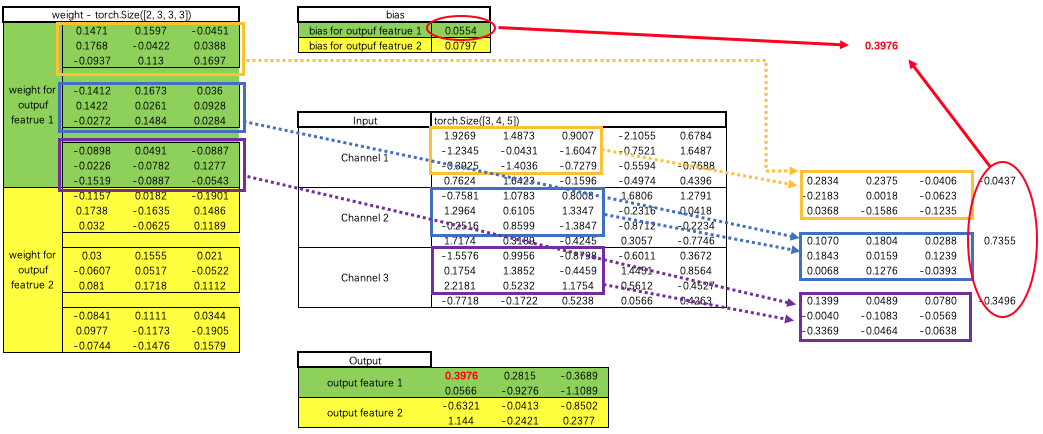
#
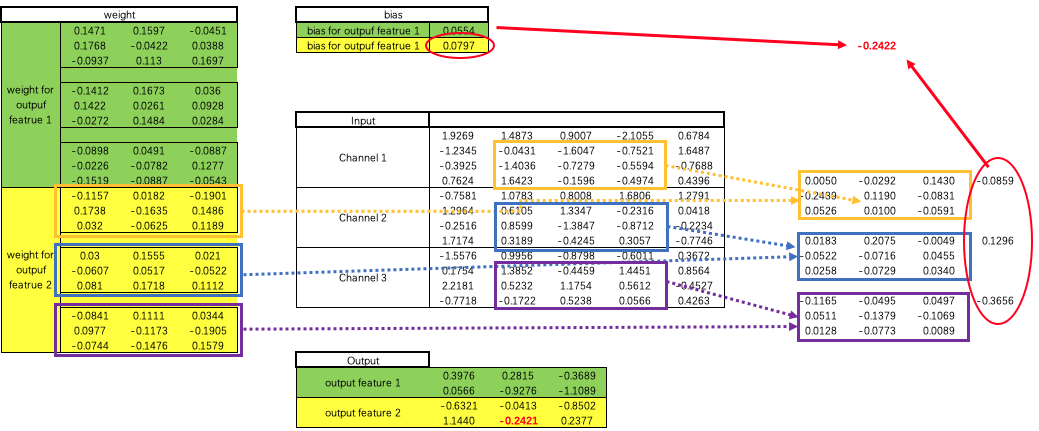

In [25]:
conv_padding(input)

tensor([[[ 0.3331,  0.0145,  0.1188,  0.8885, -0.1145],
         [-0.1731,  0.3976,  0.2815, -0.3689, -0.5202],
         [ 0.6200,  0.0566, -0.9276, -1.1089, -0.0868],
         [ 0.2517,  0.0281, -0.3551, -0.1788, -0.2545]],

        [[ 0.4388,  0.1067,  0.5349,  0.7871, -0.9074],
         [-0.7906, -0.6321, -0.0413, -0.8502,  0.2794],
         [ 0.3499,  1.1440, -0.2421,  0.2377,  0.1287],
         [ 0.8976, -0.1333,  0.3246,  0.2303, -0.2893]]],
       grad_fn=<SqueezeBackward1>)

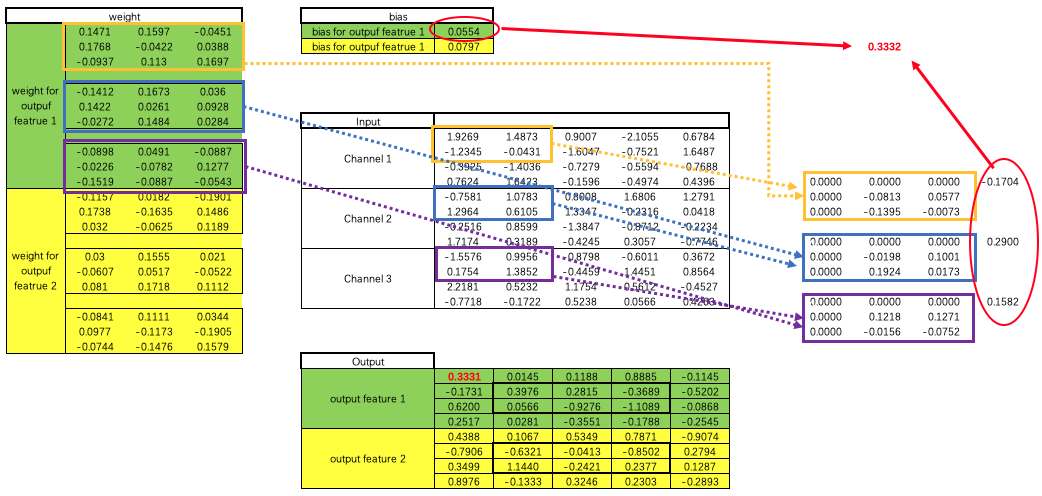
# 
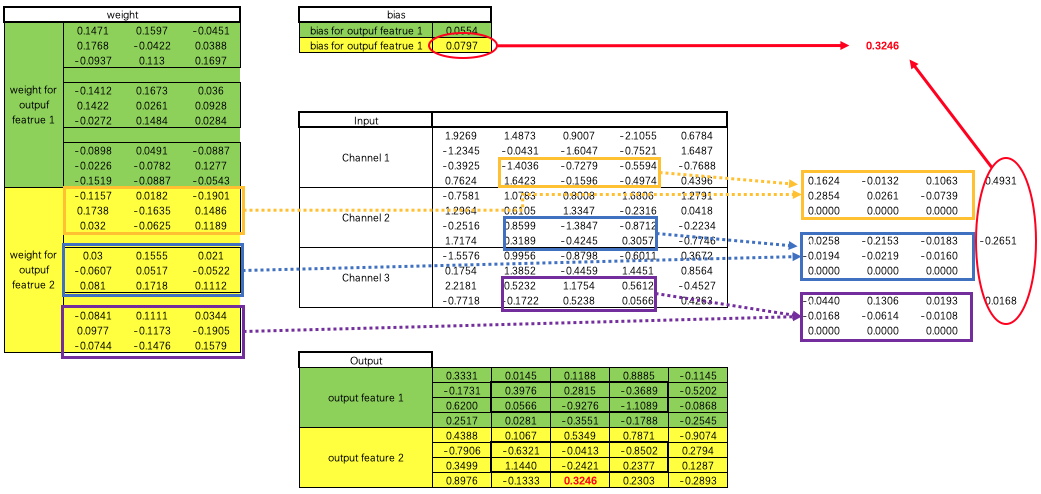

# An Example of CNN

In [26]:
batch_size     = 2
one_hot_size   = 10
sequence_width = 7
input_data = torch.randn(batch_size,one_hot_size,sequence_width)
print('input_data')
print('-'*80)
print(input_data.shape)
print('-'*80)
print(input_data)

input_data
--------------------------------------------------------------------------------
torch.Size([2, 10, 7])
--------------------------------------------------------------------------------
tensor([[[ 5.6279e-01, -2.5226e-01,  1.4472e+00,  9.7832e-01, -1.3194e+00,
          -7.1275e-02,  2.6854e-01],
         [-6.9905e-01,  1.5870e+00,  1.4213e-01,  3.7606e-01, -7.9163e-01,
           2.6678e+00, -1.4031e-01],
         [ 9.4162e-01, -1.1843e-02, -5.1969e-01,  1.8524e+00,  1.8365e+00,
           2.0741e+00, -7.3731e-01],
         [-7.6868e-01, -5.1200e-02,  1.5986e+00,  2.1227e-01,  1.1060e+00,
           1.3120e+00,  4.2418e-01],
         [-4.9229e-01,  1.6563e+00,  4.1114e-01, -2.4288e-01,  8.6345e-01,
          -1.4492e+00,  3.1427e-01],
         [-1.0053e+00, -1.3435e+00,  1.2677e+00, -1.2937e+00, -7.4146e-01,
          -3.2990e-01,  3.3011e-01],
         [ 9.8144e-01, -1.4912e+00,  5.3853e-01,  1.3362e+00, -5.6377e-01,
           6.6347e-01,  4.3149e-01],
         [-7.7288e-0

In [27]:
conv1 = nn.Conv1d(in_channels=one_hot_size, 
                  out_channels=16, 
                  kernel_size=3, 
                  padding=1
                 ) 
intermediate1 = conv1(input_data)
print('intermediate1')
print('-'*80)
print(intermediate1.shape)

intermediate1
--------------------------------------------------------------------------------
torch.Size([2, 16, 7])


In [28]:
conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3) 
intermediate2 = conv2(intermediate1)
print('intermediate2')
print('-'*80)
print(intermediate2.shape)

intermediate2
--------------------------------------------------------------------------------
torch.Size([2, 32, 5])


In [29]:
conv3 = nn.Conv1d(in_channels=32, out_channels=32, 
                  kernel_size=3, padding=1) 
intermediate3 = conv3(intermediate2)
print('intermediate3')
print('-'*80)
print(intermediate3.shape)

intermediate3
--------------------------------------------------------------------------------
torch.Size([2, 32, 5])


In [30]:
maxpool1 = nn.MaxPool2d(2)
intermediate4 = maxpool1(intermediate3)
print('intermediate4')
print('-'*80)
print(intermediate4.shape)

intermediate4
--------------------------------------------------------------------------------
torch.Size([2, 16, 2])


In [31]:
intermediate4

tensor([[[ 0.1778,  0.3046],
         [ 0.2586,  0.4921],
         [ 0.1127,  0.2293],
         [ 0.2457,  0.1549],
         [ 0.1972,  0.3832],
         [ 0.2117,  0.2269],
         [ 0.0536, -0.0411],
         [ 0.2276,  0.2442],
         [ 0.1707,  0.3769],
         [ 0.0418, -0.1338],
         [ 0.0932,  0.1209],
         [ 0.2300,  0.0050],
         [ 0.2192,  0.0133],
         [-0.0021,  0.2156],
         [-0.0105,  0.4276],
         [ 0.1624,  0.2832]],

        [[ 0.1933,  0.1184],
         [ 0.2717,  0.2889],
         [ 0.0615,  0.4018],
         [ 0.3573,  0.3307],
         [ 0.2007,  0.2135],
         [ 0.2818,  0.0916],
         [-0.0223, -0.0329],
         [ 0.3969,  0.3462],
         [ 0.2701,  0.3923],
         [ 0.0692, -0.1436],
         [-0.0335,  0.3943],
         [ 0.1717,  0.1448],
         [ 0.1912,  0.2848],
         [ 0.1811,  0.3960],
         [ 0.3375,  0.5425],
         [-0.0033,  0.2434]]], grad_fn=<MaxPool2DWithIndicesBackward0>)

In [32]:
conv4 = nn.Conv1d(in_channels=16, out_channels=24, 
                  kernel_size=3, padding=1) 
intermediate5 = conv4(intermediate4)
print('intermediate5')
print('-'*80)
print(intermediate5.shape)

intermediate5
--------------------------------------------------------------------------------
torch.Size([2, 24, 2])


In [33]:
maxpool2 = nn.MaxPool2d(2)
intermediate6 = maxpool2(intermediate5)
print('intermediate6')
print('-'*80)
print(intermediate6.shape)

intermediate6
--------------------------------------------------------------------------------
torch.Size([2, 12, 1])


In [34]:
print('input_data')
print(input_data.shape)
print('-'*60)
print("nn.Conv1d(in_channels=one_hot_size,out_channels=16,kernel_size=3,padding=1)")
print('intermediate1')
print(intermediate1.shape)
print('-'*60)
print("nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3)")
print('intermediate2')
print(intermediate2.shape)
print('-'*60)
print("nn.Conv1d(in_channels=32, out_channels=32, kernel_size=3, padding=1) ")
print('intermediate3')
print(intermediate3.shape)
print('-'*60)
print("nn.MaxPool2d(2)")
print('intermediate4')
print(intermediate4.shape)
print('-'*60)
print("nn.Conv1d(in_channels=16, out_channels=24, kernel_size=3, padding=1) ")
print('intermediate5')
print(intermediate5.shape)
print('-'*60)
print("nn.MaxPool2d(2)")
print('intermediate6')
print(intermediate6.shape)
print('-'*60)


input_data
torch.Size([2, 10, 7])
------------------------------------------------------------
nn.Conv1d(in_channels=one_hot_size,out_channels=16,kernel_size=3,padding=1)
intermediate1
torch.Size([2, 16, 7])
------------------------------------------------------------
nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3)
intermediate2
torch.Size([2, 32, 5])
------------------------------------------------------------
nn.Conv1d(in_channels=32, out_channels=32, kernel_size=3, padding=1) 
intermediate3
torch.Size([2, 32, 5])
------------------------------------------------------------
nn.MaxPool2d(2)
intermediate4
torch.Size([2, 16, 2])
------------------------------------------------------------
nn.Conv1d(in_channels=16, out_channels=24, kernel_size=3, padding=1) 
intermediate5
torch.Size([2, 24, 2])
------------------------------------------------------------
nn.MaxPool2d(2)
intermediate6
torch.Size([2, 12, 1])
------------------------------------------------------------
